# Key Insights
### Job location is the top deciding factor of Data Engineers' salary variation in this dataset (R-Square 30%+)
Overall average estimated salary of a data engineer is about USD 100K, and median is USD 97K, whereas a data engineer in California earns USD 128K, for both mean and median.
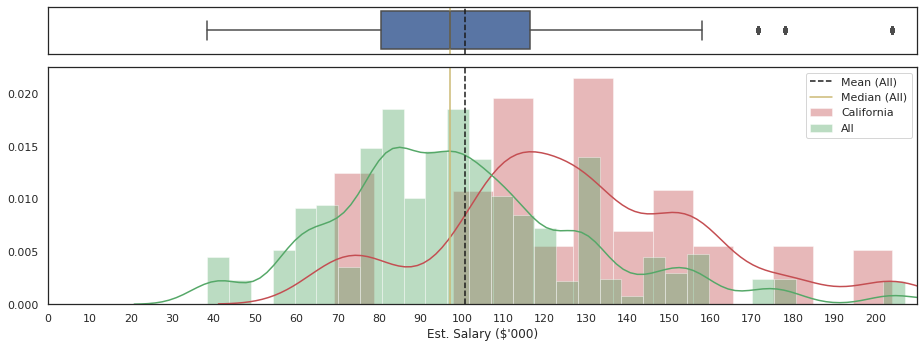

### Plenty of high-paid opportunities for Data Engineer are in San Diego. 
One-third of California's Data Engineer jobs come from San Diego. Data Engineers are paid 33K higher than the average. Meanwhile Data Engineers in many Texas and Florida cities are highly undervalued.
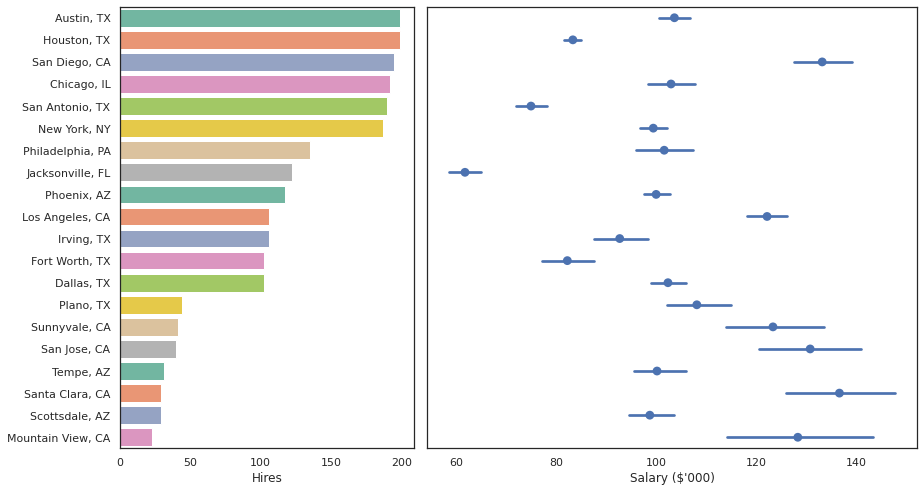

### On Data Engineers' job titles, functional keywords matter much more than seniorities. These functional keywords on titles may be a clue in identifying high-paying Data Engineer positions.
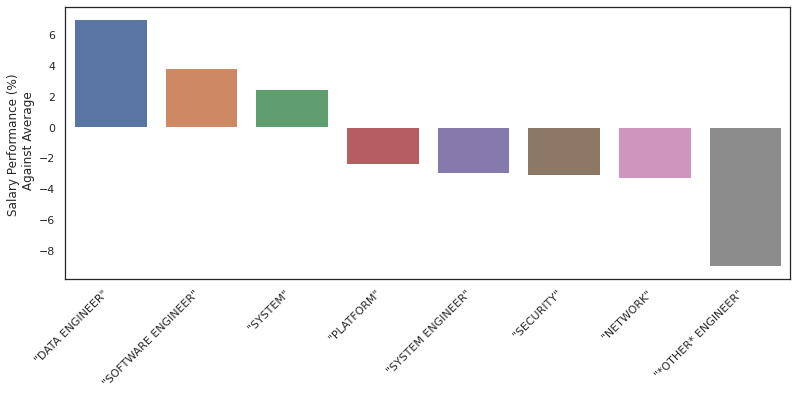

### 70% of Data Engineer jobs do not require Master/PHD degrees. Experience/skill/knowledge in SQL, PYTHON, SPARK, AWS and Data Security are more required.
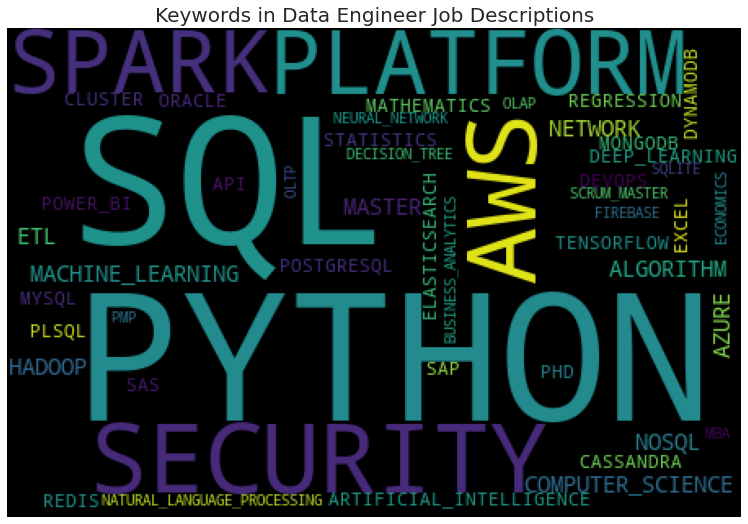

### These experience/skills/knowledge may help boost your earnings as a Data Engineer.
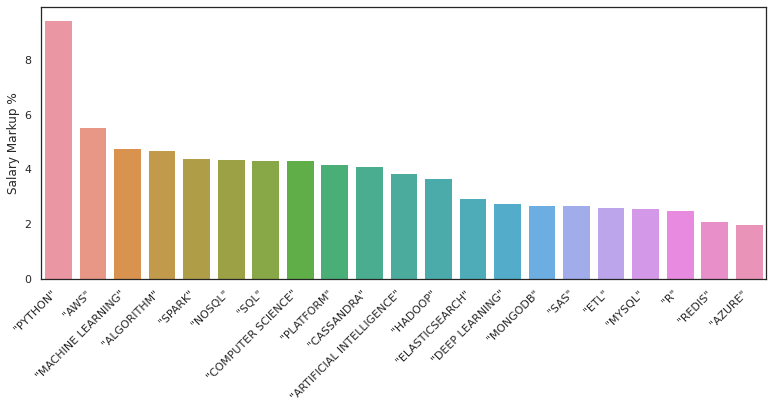

### Larger firms do not necessarily pay more to Data Engineers.
Instead, high demands with slightly higher salaries are found in clusters such as follows. Meanwhile, a big portion of data engineer positions are released from financially unpublic firms.
* **California Small firms (especially 51-200 employees & USD5-50M revenues)** 
* **California medium-large businesses (1001-5000 employees & 50M-1B revenues unknown)**
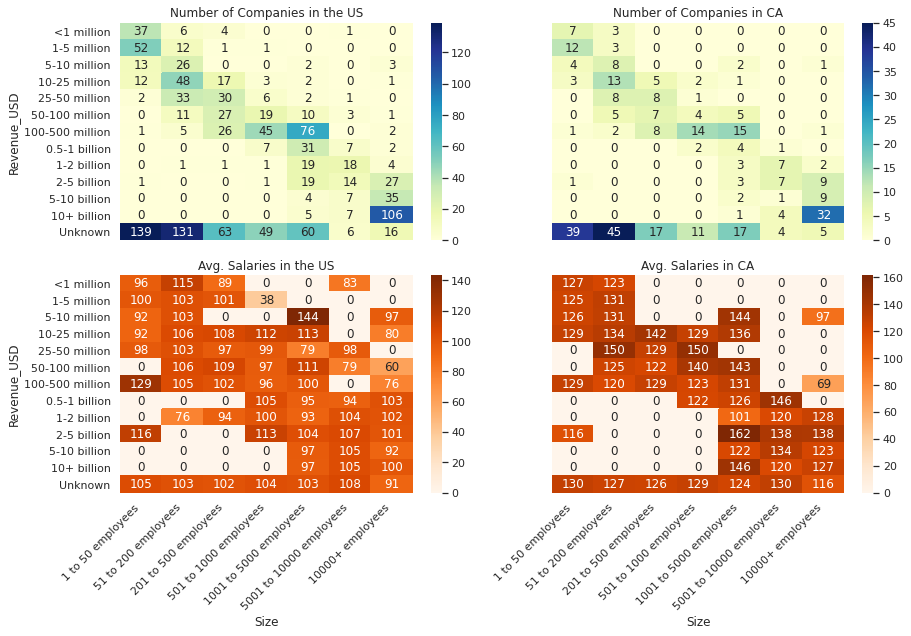

# About
## Dataset
This dataset was created by [picklesueat](https://github.com/picklesueat/data_jobs_data) and contains more than 2000 job listing for data engineer positions (all assumed to be open positions at the time the dataset was published in July 2020), with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.

## Objectives
* What kind of Data Engineer jobs get higher salaries? (Job Title, Job Description, EasyApply)
* What kind of companies pay more? (Rating, Company, Size, *Years established (now - Founded)*, Type of ownership, Industry & Sector, Revenue)
* Does job/headquarters location matter to salaries?

## Methodologies

1. Exploratory Data Analysis (distribution, boxplot, barcharts, errorbars, heatmaps, scatterplots...etc.)
2. T-test
3. Multiple Regression

## Limitations and Assumptions

* The results only reflet the outcome at the time the dataset was published, which is pressumed to be July 2020. Seasonal variation is disregarded (not a time-series data).
* Somehow remote positions are not found in this dataset, so the impact of pandemic (more jobs becoming remote) on salary cannot be measured.
* The salary estimates come from Glassdoor, which may not reflect the actual salaries.
* The dataset is assumed to reflect the traits of the actual job market.
* The salaries are nominal, not adjusted by living costs or consumer price index.

# Data Preparation

## Import Libraries and Dataset

In [ ]:
import numpy as np 
# large, multi-dimensional arrays and matrices, 
# along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd
# data structures and operations for manipulating numerical tables and time series
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
# plotting
import plotly.express as px
# graph
import plotly.graph_objects as go
# graph
import seaborn as sns
# t-test
from scipy import stats
# regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Word Cloud
from wordcloud import WordCloud

In [ ]:
data=pd.read_csv('../input/data-engineer-jobs/DataEngineer.csv')

## Explore the Data

In [ ]:
data.head(2)

Data includes job title , salary estimation , job description , rating ,company name , location and many more ...
"Easy Apply" should be the function that applicants can directly apply a job directly through 3rd party jobboard (e.g. Glassdoor, LinkedIn...) without logging into the hiring company's career site.

In [ ]:
data.describe(include='all')

## Data Cleaning

In [ ]:
# Check for missing values
def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()
    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)
    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1) 
    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0:'Missing Values',1:'% of Total Values'})
    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values(
        '% of Total Values',ascending=False).round(1) #Review
    print("Your selected datset has "+str(df.shape[1])+" columns and "+str(len(df))+" observations.\n"
         "There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(data)

In [ ]:
data['Easy Apply'].value_counts()

In [ ]:
data['Competitors'].value_counts()

As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

In [ ]:
# Replace -1 or -1.0 or '-1' to NaN
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
missing_values_table(data)

Now you can see there are lots of missing values in the dataset. Most positions don't support the Easy Apply function. Competitors are not identified for majority of the companies.

In [ ]:
#Remove '\n' from Company Name. 
data['Company Name'],_=data['Company Name'].str.split('\n', 1).str
# 1st column after split, 2nd column after split (delete when '_')
# string.split(separator, maxsplit) maxsplit default -1, which means all occurrances

In [ ]:
# Split salary into two columns min salary and max salary.
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

In [ ]:
# Split salary into two columns min salary and max salary.
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
# lstrip is for removing leading characters
# rstrip is for removing rear characters

In [ ]:
#Drop the original Salary Estimate column
data.drop(['Salary Estimate'],axis=1,inplace=True)

In [ ]:
# To estimate the salary with regression and other analysis, better come up with one number: Est_Salary = (Min_Salary+Max_Salary)/2
data['Est_Salary']=(data['Min_Salary']+data['Max_Salary'])/2

In [ ]:
# Create a variable for how many years a firm has been founded
data['Years_Founded'] = 2020 - data['Founded']

In [ ]:
# A final look at the data before analysis
data.head(2)

# Exploratory Analysis

## Salary Distribution of All Data Engineers

In [ ]:
plt.figure(figsize=(13,5))
sns.set() #style==background
sns.distplot(data['Min_Salary'], color="b")
sns.distplot(data['Max_Salary'], color="r")

plt.xlabel("Salary ($'000)")
plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary']})
plt.title("Distribution of Min & Max Salary",fontsize=19)
plt.xlim(0,210)
plt.xticks(np.arange(0, 210, step=10))
plt.tight_layout()
plt.show()

* By the modes of distribution, we can say Data Engineer's minimum salary is 55K and maximum 105K.
* The Salaries distributions of Data Engineers are quite spread.

In [ ]:
min_max_view = data.sort_values(['Min_Salary','Max_Salary'],ascending=True).reset_index(drop=True).reset_index()

In [ ]:
f, (ax_box, ax_line) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios": (0.05,1)},figsize=(13,5))
mean=min_max_view['Est_Salary'].mean()
median=min_max_view['Est_Salary'].median()

bpv = sns.boxplot(y='Est_Salary',data=min_max_view, ax=ax_box).set(ylabel="Est. Salary ($'000)")
ax_box.axhline(mean, color='k', linestyle='--')
ax_box.axhline(median, color='y', linestyle='-')

lp1 = sns.lineplot(x='index',y='Min_Salary',data=min_max_view, color='b')
lp2 = sns.lineplot(x='index',y='Max_Salary',ax=ax_line,data=min_max_view, color='r')
ax_line.axhline(mean, color='k', linestyle='--')
ax_line.axhline(median, color='y', linestyle='-')

plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary'],'Mean':mean,'Median':median})
plt.title("Salary Estimates of Each Engineer",fontsize=19)
plt.xlabel("Observations")
plt.tight_layout()
plt.show()

Another view the see the distribution of salary min, max, mean and median: 
* X-axis: the id(index) of all observations sorted by ascending order of min salaries.
* There's 50% chance a data engineer's salary would be **at least** (minimum) higher than 75K.
* There's 95% chance a data engineer's salary is within 40K-160K.

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

Focus only on Est. Salary(Avg. of Min & Max). Both mean and median are around 100K.

## Distribution of Company Ages

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Years_Founded'].mean()
median=data['Years_Founded'].median()

bph = sns.boxplot(data['Years_Founded'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Years_Founded'],ax=ax_hist, color="g").set(xlabel="Years_Founded")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,240)
plt.xticks(np.arange(0,240,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

## Distribution of Company Ratings

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Rating'].mean()
median=data['Rating'].median()

bph = sns.boxplot(data['Rating'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Rating'],ax=ax_hist, color="g").set(xlabel="Ratings")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,6)
plt.xticks(np.arange(0,6,step=1))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

## Hires and Salary Estimates by Firms (Top 20)

I want to know the companies actively hiring Data Engineers and the estimated salaries they offer.

In [ ]:
# First I count the positions opened by the companies.
df_by_firm=data.groupby('Company Name')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
# When we reset the index, the old index is added as a column, and a new sequential index is used

In [ ]:
# Merge with original data to get salary estimates.
Sal_by_firm = df_by_firm.merge(data,on='Company Name',how='left')

In [ ]:
sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Company Name',data=Sal_by_firm,ax=ax_bar, palette='Set2').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Company Name',data=Sal_by_firm, join=False,ax=ax_point).set(
    ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* The lines in the Salary chart represent 95% confidence interval, whereas points are point estimates.
* Amazon was hiring most data engineers at by USD100K+.
* Apple and Management Decisions, Inc. are with the highest est. salaries.
* All sample sizes for those companies are lower than 30, so we'd better be conservative about the est. salaries by firms.

## Hires and Salary Estimates by Job Location Cities (Top 20)

In [ ]:
df_by_city=data.groupby('Location')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
Sal_by_city = df_by_city.merge(data,on='Location',how='left')

In [ ]:
sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Location',data=Sal_by_city,ax=ax_bar, palette='Set2').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Location',data=Sal_by_city, join=False,ax=ax_point).set(
    ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* Cities in CA and TX hire the most Data Engineers. Citywise, New York and Chicago are also on top of the chart.
* Salaries are higher in cities of CA.

## Hires and Salary Estimates by Job Location States

In [ ]:
data['City'],data['State'] = data['Location'].str.split(', ',1).str

In [ ]:
data['State']=data['State'].replace('Arapahoe, CO','CO')

In [ ]:
stateCount = data.groupby('State')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
stateCount = stateCount.merge(data, on='State',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='State',data=stateCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='State',data=stateCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

Not many states are hiring Data engineers. Though there are more opportunities in TX, CA offers much higher pay.

## Hires and Salary Estimates by Headquarters Location (Top 20)

In [ ]:
data['HQCity'],data['HQState'] = data['Headquarters'].str.split(', ',1).str

In [ ]:
data['HQState']=data['HQState'].replace('NY (US), NY','NY')

In [ ]:
HQCount = data.groupby('HQState')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).head(20).reset_index(drop=True)
HQCount = HQCount.merge(data, on='HQState',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='HQState',data=HQCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* Big portion of companies hiring Data Engineers are headquartered in California. 
* With such high level of demand, Data engineers' salaries are obviously undervalued.
* We can also see foreign companies like India, Japan and UK.

## Hires and Salary Estimates by Revenue

In [ ]:
RevCount = data.groupby('Revenue')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)

In [ ]:
#Make the Revenue column clean
RevCount["Revenue_USD"]=['Unknown','10+ billion','100-500 million','50-100 million','2-5 billion','10-25 million','25-50 million','1-5 million','5-10 billion','<1 million','1-2 billion','0.5-1 billion','5-10 million']
#Merge the new Revenue back to data
RevCount2 = RevCount[['Revenue','Revenue_USD']]
RevCount = RevCount.merge(data, on='Revenue',how='left')

In [ ]:
data=data.merge(RevCount2,on='Revenue',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Revenue_USD',data=RevCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Revenue_USD',data=RevCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

1,000+ (40%+) of Data Engineer jobs are released from financially unpublic or medium businesses.

## Hires and Salary Estimates by Size

In [ ]:
SizeCount = data.groupby('Size')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
SizeCount = SizeCount.merge(data, on='Size',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Size',data=SizeCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Size',data=SizeCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

Giant companies hire the most Data Engineers but they don't necessarily pay more.

## Hires and Salary Estimates by Sector (Top 12)

In [ ]:
SecCount = data.groupby('Sector')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
SecCount = SecCount.merge(data, on='Sector',how='left')
SecCount = SecCount[SecCount['Hires']>29]

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Sector',data=SecCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Sector',data=SecCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* IT companies hire the most Data Engineers, followed by Business Services and Finance companies.
* Healthcare-related Data Engineer jobs seem to have better pay.

## Hires and Salary Estimates by Type of Ownership

In [ ]:
OwnCount = data.groupby('Type of ownership')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
OwnCount = OwnCount.merge(data, on='Type of ownership',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Type of ownership',data=OwnCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Type of ownership',data=OwnCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

Private companies' demand are higher, and the salary offers are comparable to public firms.

## Hires and Salary Estimates by Job Titles

↓Here's a series operations to create and clean a dataset to dissect texts in Job Titles and Descriptions

In [ ]:
# create a new dataset from original data
text_Analysis = data[['Job Title','Job Description','Est_Salary','Max_Salary','Min_Salary','City','State','Easy Apply','Revenue_USD','Rating','Size','Industry','Sector','Type of ownership','Years_Founded','Company Name','HQState']]
# remove special characters and unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job Title'].str.upper().replace('[^A-Za-z0-9]+', ' ',regex=True)
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['Â','AND ','WITH ','SYSTEMS','OPERATIONS','ANALYTICS','SERVICES','ENGINEERS','NETWORKS','GAMES','MUSICS','INSIGHTS','SOLUTIONS','JR ','MARKETS','STANDARDS','FINANCE','PRODUCTS','DEVELOPERS','SR '],
    ['','','','SYSTEM','OPERATION','ANALYTIC','SERVICE','ENGINEER','NETWORK','GAME','MUSIC','INSIGHT','SOLUTION','JUNIOR ','MARKET','STANDARD','FINANCIAL','PRODUCT','DEVELOPER','SENIOR '],regex=True)

In [ ]:
# unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['BUSINESS INTELLIGENCE','INFORMATION TECHNOLOGY','QUALITY ASSURANCE','USER EXPERIENCE','USER INTERFACE','DATA WAREHOUSE','DATA ANALYST','DATA BASE','DATA QUALITY','DATA GOVERNANCE','BUSINESS ANALYST','DATA MANAGEMENT','REPORTING ANALYST','BUSINESS DATA','SYSTEM ANALYST','DATA REPORTING','QUALITY ANALYST','DATA ENGINEER','BIG DATA','SOFTWARE ENGINEER','MACHINE LEARNING','FULL STACK','DATA SCIENTIST','DATA SCIENCE','DATA CENTER','ENTRY LEVEL','NEURAL NETWORK','SYSTEM ENGINEER'],
    ['BI','IT','QA','UX','UI','DATA_WAREHOUSE','DATA_ANALYST','DATABASE','DATA_QUALITY','DATA_GOVERNANCE','BUSINESS_ANALYST','DATA_MANAGEMENT','REPORTING_ANALYST','BUSINESS_DATA','SYSTEM_ANALYST','DATA_REPORTING','QUALITY_ANALYST','DATA_ENGINEER','BIG_DATA','SOFTWARE_ENGINEER','MACHINE_LEARNING','FULL_STACK','DATA_SCIENTIST','DATA_SCIENCE','DATA_CENTER','ENTRY_LEVEL','NEURAL_NETWORK','SYSTEM_ENGINEER'],regex=True)

In [ ]:
# unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['DATA_ENGINEER JUNIOR','DATA_ENGINEER SENIOR','DATA  REPORTING_ANALYST'],
    ['JUNIOR DATA_ENGINEER','SENIOR DATA_ENGINEER','DATA_REPORTING_ANALYST'],regex=True)

↓Preparing for visualisation

In [ ]:
jobCount=text_Analysis.groupby('Job_title_2')[['Job Title']].count().reset_index().rename(
    columns={'Job Title':'Count'}).sort_values('Count',ascending=False)
jobSalary = text_Analysis.groupby('Job_title_2')[['Max_Salary','Est_Salary','Min_Salary']].mean().sort_values(
    ['Max_Salary','Est_Salary','Min_Salary'],ascending=False)
jobSalary['Spread']=jobSalary['Max_Salary']-jobSalary['Est_Salary']
jobSalary=jobSalary.merge(jobCount,on='Job_title_2',how='left').sort_values('Count',ascending=False).head(20)

In [ ]:
f, axs = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios":(1,0.5)},figsize=(13,8))

ax = axs[0]
ax.errorbar(x='Job_title_2',y='Est_Salary',data=jobSalary,yerr=jobSalary['Spread'],fmt='o')
ax.set_ylabel('Est. Salary ($\'000)')

ax = axs[1]
sns.barplot(x=jobSalary['Job_title_2'],y=jobSalary['Count']).set(xlabel="")

plt.xticks(rotation=65,horizontalalignment='right')
plt.tight_layout()

Again created a bar chart & error bar combo intended to see the salaries and counts, but not very effective (most sample sizes are under 30) as there are too many ways in presenting a position's name even some wordings are standardized. 

### Regression model may be a better approach: some certain keywords in job title/desc may be correlated with salary pay.

# Regression Analysis

## Correlation: Job Title Keywords vs Salary

In [ ]:
# get top keywords
s = text_Analysis['Job_title_2'].str.split(expand=True).stack().value_counts().reset_index().rename(
    columns={'index':'KW',0:'Count'})
S = s[s['Count']>29]
S

In [ ]:
# write get_keyword method
def get_keyword(x):
   x_ = x.split(" ")
   keywords = []
   try:
      for word in x_:
         if word in np.asarray(S['KW']):
            keywords.append(word)
   except:
      return -1

   return keywords

In [ ]:
# get keywords from each row
text_Analysis['KW'] = text_Analysis['Job_title_2'].apply(lambda x: get_keyword(x))

In [ ]:
# create dummy columns by keywords
kwdummy = pd.get_dummies(text_Analysis['KW'].apply(pd.Series).stack()).sum(level=0).replace(2,1)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True).replace(np.nan,0)

In [ ]:
# run t-test for top keywords to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests=[]
for word in text_columns:
    if word in set(S['KW']):
        ttest = stats.ttest_ind(text_Analysis[text_Analysis[word]==1]['Est_Salary'],
                                     text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests.append([word,ttest])
        
ttests = pd.DataFrame(ttests,columns=['KW','R'])
ttests['R']=ttests['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests['Statistic'],ttests['P-value']=ttests['R'].str.split(', ',1).str
ttests=ttests.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests

In [ ]:
# Selecting keywords with p-value <0.1 into multiple regression model.
ttest_pass = list(ttests[ttests['P-value'].astype(float)<0.1]['KW'])
print(*ttest_pass,sep=' + ')

In [ ]:
TitleBar=ttests[ttests['P-value'].astype(float)<0.05]
TitleBar['Statistic']=(TitleBar['Statistic'].astype(float)/101)*100
TitleBar=TitleBar.sort_values('Statistic',ascending=False).replace(
    'ENGINEER','*OTHER*_ENGINEER').replace('_',' ',regex=True)
TitleBar['KW']='"' + TitleBar['KW'] + '"'

In [ ]:
fig = plt.figure(figsize=(13, 5))
sns.barplot(x='KW',y='Statistic',data=TitleBar).set(xlabel="",ylabel="Salary Performance (%) \n Against Average")

plt.xticks(rotation=45,horizontalalignment='right')

In [ ]:
# run regression
# Remove variables with p-value >0.05 one by one until all <0.05
titleMod_final = ols("Est_Salary ~ SOFTWARE_ENGINEER + NETWORK + SECURITY + SYSTEM_ENGINEER + SYSTEM + SOFTWARE + MACHINE_LEARNING + ENGINEER + DATA_ENGINEER",
               data=text_Analysis).fit()
print(titleMod_final.summary())

* The seniorities are not relevant, but functional words (SOFTWARE, NETWORK...) are.
* This model can explain less than 5% of variations in salaries.

In [ ]:
# Plot with scatterplots
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(titleMod_final,fig=fig)
fig.tight_layout(pad=1.0)
# Sorry somebody tell me how to remove that "Partial Regression Plot"

## Correlation: Job Description vs Salary

In [ ]:
text_Analysis['Job_Desc2'] = text_Analysis['Job Description'].replace('[^A-Za-z0-9]+', ' ',regex=True)

In [ ]:
text_Analysis['Job_Desc2'] = text_Analysis['Job_Desc2'].str.upper().replace(
    ['COMPUTER SCIENCE','ENGINEERING DEGREE',' MS ','BUSINESS ANALYTICS','SCRUM MASTER','MACHINE LEARNING',' ML ','POWER BI','ARTIFICIAL INTELLIGENCE',' AI ','ALGORITHMS','DEEP LEARNING','NEURAL NETWORK','NATURAL LANGUAGE PROCESSING','DECISION TREE','CLUSTERING','PL SQL'],
    ['COMPUTER_SCIENCE','ENGINEERING_DEGREE',' MASTER ','BUSINESS_ANALYTICS','SCRUM_MASTER','MACHINE_LEARNING',' MACHINE_LEARNING ','POWER_BI','ARTIFICIAL_INTELLIGENCE',' ARTIFICIAL_INTELLIGENCE ','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','CLUSTER','PLSQL'],regex=True)

In [ ]:
# Create a list of big data buzzwords to see if those words in JD would influence the salary
buzzwords = ['COMPUTER_SCIENCE','MASTER','MBA','SQL','PYTHON','R','PHD','BUSINESS_ANALYTICS','SAS','PMP','SCRUM_MASTER','STATISTICS','MATHEMATICS','MACHINE_LEARNING','ARTIFICIAL_INTELLIGENCE','ECONOMICS','TABEAU','AWS','AZURE','POWER_BI','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','REGRESSION','CLUSTER','ORACLE','EXCEL','TENSORFLOW','HADOOP','SPARK','NOSQL','SAP','ETL','API','PLSQL','MONGODB','POSTGRESQL','ELASTICSEARCH','REDIS','MYSQL','FIREBASE','SQLITE','CASSANDRA','DYNAMODB','OLTP','OLAP','DEVOPS','PLATFORM','NETWORK','APACHE','SECURITY']

In [ ]:
# Count the JD keywords.
S2 = text_Analysis['Job_Desc2'].str.split(expand=True).stack().value_counts().reset_index().rename(
    columns={'index':'KW',0:'Count'})
S2 = S2[S2['KW'].isin(buzzwords)].reset_index(drop=True)
# .sort_values('Count',ascending=False)
S2_TOP = S2[S2['Count']>29]
S2_TOP_JD = S2_TOP
S2_TOP_JD['KW'] = S2_TOP_JD['KW'] +'_JD'
S2_TOP_JD

In [ ]:
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(S2['KW']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title("Keywords in Data Engineer Job Descriptions",fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [ ]:
# write get_keyword method
def get_keyword(x):
   x_ = x.split(" ")
   keywords = []
   try:
      for word in x_:
         if word + '_JD' in np.asarray(S2_TOP_JD['KW']):
            keywords.append(word + '_JD')
   except:
      return -1

   return keywords

In [ ]:
# get keywords from each row
text_Analysis['JDKW'] = text_Analysis['Job_Desc2'].apply(lambda x: get_keyword(x))

In [ ]:
# create dummy columns by keywords
kwdummy = pd.get_dummies(text_Analysis['JDKW'].apply(pd.Series).stack()).sum(level=0)
# Since a JD sometimes repeat a keyword, the value may >1
# But what we want to know is whether the appearance of the keyword impact the salary, not frequency
# So values >1 have to be replaced by 1, but there must be a better way than coding like this ↓
kwdummy = kwdummy.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,35,39],
                         [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [ ]:
# merge back the dummy columns to the main dataset
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
# let's see if number of buzzwords contained or how wordy the JD is would have impact.
text_Analysis['JDKWlen']=text_Analysis['JDKW'].str.len()
text_Analysis['JDlen']=text_Analysis['Job Description'].str.len()

In [ ]:
# run t-test for top keywords to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_JD=[]
for word in text_columns:
    if word in set(S2_TOP_JD['KW']):
        ttest2 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_JD.append([word,ttest2])

ttests_JD = pd.DataFrame(ttests_JD,columns=['KW','R'])
ttests_JD['R']=ttests_JD['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_JD['Statistic'],ttests_JD['P-value']=ttests_JD['R'].str.split(', ',1).str
ttests_JD=ttests_JD.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_JD

In [ ]:
JDBar=ttests_JD[(ttests_JD['P-value'].astype(float)<0.05)&(ttests_JD['Statistic'].astype(float)>0)]
JDBar['Statistic']=(JDBar['Statistic'].astype(float)/101)*100
JDBar=JDBar.sort_values('Statistic',ascending=False).replace('_JD','',regex=True).replace('_',' ',regex=True)
JDBar['KW']='"' + JDBar['KW'] + '"'

In [ ]:
fig = plt.figure(figsize=(13, 5))
sns.barplot(x='KW',y='Statistic',data=JDBar).set(xlabel="",ylabel="Salary Markup %")

plt.xticks(rotation=45,horizontalalignment='right')

In [ ]:
#Selecting keywords with p-value <0.1 into multiple regression model.
ttest_JD_pass1 = list(ttests_JD[ttests_JD['P-value'].astype(float)<0.05]['KW'])
print(*ttest_JD_pass1,sep=' + ')

In [ ]:
#Run regression and remove variables with p-value >0.05 one by one until all <0.05
JDMod = ols("Est_Salary ~ CLUSTER_JD + COMPUTER_SCIENCE_JD + ALGORITHM_JD + PLATFORM_JD + PYTHON_JD + CASSANDRA_JD",
               data=text_Analysis).fit()
print(JDMod.summary())

It is unclear why 'Cluster' or 'Clustering' in JD would lead to lower salaries.

In [ ]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(JDMod,fig=fig)
fig.tight_layout(pad=1.0)

## Correlation: Job Location (State) vs Salary

In [ ]:
# create dummy columns by State
kwdummy = pd.get_dummies(text_Analysis['State'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S3 = text_Analysis['State'].value_counts().reset_index().rename(
    columns={'index':'State','State':'Count'})
S3_Top = S3[S3['Count']>29]
S3_Top

In [ ]:
#run t-test for top states hiring engineers to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_state=[]
for word in text_columns:
    if word in set(S3_Top['State']):
        ttest3 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_state.append([word,ttest3])

ttests_state = pd.DataFrame(ttests_state,columns=['State','R'])
ttests_state['R']=ttests_state['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_state['Statistic'],ttests_state['P-value']=ttests_state['R'].str.split(', ',1).str
ttests_state=ttests_state.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_state

In [ ]:
#Selecting states with p-value <0.1 into multiple regression model.
ttest_state_pass = list(ttests_state[ttests_state['P-value'].astype(float)<0.1]['State'])
print(*ttest_state_pass,sep=' + ')

In [ ]:
StateMod = ols("Est_Salary ~ FL + CA + TX",
               data=text_Analysis).fit()
print(StateMod.summary())

The regional difference (job location) is the most crucial factor to the salary variation.

In [ ]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(StateMod,fig=fig)
fig.tight_layout(pad=1.0)

## Correlation: Job Location (City) vs Salary

In [ ]:
text_Analysis['City']=text_Analysis['City'].str.replace(' ','_',regex=True)

In [ ]:
S35 = text_Analysis['City'].value_counts().reset_index().rename(
    columns={'index':'City','City':'Count'})
S35_Top = S35[S35['Count']>29]

In [ ]:
# create dummy columns by City
kwdummy = pd.get_dummies(text_Analysis[text_Analysis['City'].isin(np.asarray(S35_Top['City']))]['City'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
#run t-test for top cities hring data engineers to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_city=[]
for word in text_columns:
    if word in set(S35_Top['City']):
        ttest35 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_city.append([word,ttest35])

ttests_city = pd.DataFrame(ttests_city,columns=['City','R'])
ttests_city['R']=ttests_city['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_city['Statistic'],ttests_city['P-value']=ttests_city['R'].str.split(', ',1).str
ttests_city=ttests_city.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_city

In [ ]:
#Selecting cities with p-value <0.1 into multiple regression model.
ttest_city_pass = list(ttests_city[ttests_city['P-value'].astype(float)<0.1]['City'])
print(*ttest_city_pass,sep=' + ')

In [ ]:
CityMod = ols("Est_Salary ~ Irving + Jacksonville + Houston + Fort_Worth + San_Jose + San_Diego + Los_Angeles + San_Antonio + Sunnyvale",
               data=text_Analysis).fit()
print(CityMod.summary())

## Correlation: HQ Location (State) vs Salary

In [ ]:
S31 = text_Analysis['HQState'].value_counts().reset_index().rename(
    columns={'index':'HQState','HQState':'Count'}).replace(0,'Unknown_State')
S31_Top = S31[S31['Count']>29]
S31_Top['HQState_HQ'] = [s + '_HQ' for s in S31_Top['HQState']]

In [ ]:
# create dummy columns by HQ State
kwdummy = pd.get_dummies(S31_Top['HQState_HQ'].apply(pd.Series).stack()).sum(level=0)
S31_Top2 = S31_Top.merge(kwdummy,left_index=True,right_index=True,how='left').drop(['Count'],axis=1)
text_Analysis = text_Analysis.merge(S31_Top2,on='HQState',how='left').replace(np.nan,0)

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_HQstate=[]
for word in text_columns:
    if word in set(S31_Top['HQState_HQ']):
        ttest31 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_HQstate.append([word,ttest31])

ttests_HQstate = pd.DataFrame(ttests_HQstate,columns=['HQState_HQ','R'])
ttests_HQstate['R']=ttests_HQstate['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_HQstate['Statistic'],ttests_HQstate['P-value']=ttests_HQstate['R'].str.split(', ',1).str
ttests_HQstate=ttests_HQstate.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_HQstate

In [ ]:
ttest_HQstate_pass = list(ttests_HQstate[ttests_HQstate['P-value'].astype(float)<0.1]['HQState_HQ'])
print(*ttest_HQstate_pass,sep=' + ')

In [ ]:
HQStateMod = ols("Est_Salary ~ FL_HQ + TX_HQ + CA_HQ",
               data=text_Analysis).fit()
print(HQStateMod.summary())

Companies headquartered in CA pay more.

## More Variables: Revenue, Size, Sector, Industry and Type of Ownership

In [ ]:
#Remove special characters.
text_Analysis['Revenue_USD'] = text_Analysis['Revenue_USD'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(['_1_million','Unknown','5_10_billion'],['Small_Business','RevUnknown','Large_Corp'])
text_Analysis['Size'] = text_Analysis['Size'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(['51_to_200_employees','10000_employees'],['SMB','Giant']).replace('Unknown','SizeUnknown')
text_Analysis['Sector'] = text_Analysis['Sector'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','SectorUnknown').replace(['Government','Unknown'],['GovSec','SectorUnknown'])
text_Analysis['Industry'] = text_Analysis['Industry'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','IndUnknown')
text_Analysis['Type of ownership'] = text_Analysis['Type of ownership'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','OwnUnknown')

In [ ]:
#Rename column name for running regression later.
text_Analysis = text_Analysis.rename(columns={"Easy Apply":"Easy_Apply"})

### [Create Revenue Variables for Multiple Regression]

In [ ]:
# create dummy columns by Revenue
kwdummy = pd.get_dummies(text_Analysis['Revenue_USD'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S4 = text_Analysis['Revenue_USD'].value_counts().reset_index().rename(
    columns={'index':'Revenue_USD','Revenue_USD':'Count'})
S4_Top = S4[S4['Count']>29]
S4_Top

Revenue '0' are those NaN values replaced for making dummy columns and are to be ignored.

In [ ]:
#run t-test to see the salary differences by companies' revenue.
text_columns = list(text_Analysis.columns)
ttests_rev=[]
for word in text_columns:
    if word in set(S4_Top['Revenue_USD']):
        ttest4 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_rev.append([word,ttest4])

ttests_rev = pd.DataFrame(ttests_rev,columns=['Revenue_USD','R'])
ttests_rev['R']=ttests_rev['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_rev['Statistic'],ttests_rev['P-value']=ttests_rev['R'].str.split(', ',1).str
ttests_rev=ttests_rev.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_rev

In [ ]:
#Selecting revenues with p-value <0.1 into multiple regression model.
ttest_rev_pass = list(ttests_rev[ttests_rev['P-value'].astype(float)<0.1]['Revenue_USD'])
print(*ttest_rev_pass,sep=' + ')

### [Create Size Variables for Multiple Regression]

In [ ]:
kwdummy = pd.get_dummies(text_Analysis['Size'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S5 = text_Analysis['Size'].value_counts().reset_index().rename(
    columns={'index':'Size','Size':'Count'})
S5_Top = S5[S5['Count']>29]
S5_Top

Size '0' are those NaN values replaced for making dummy columns and are to be ignored.

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_size=[]
for word in text_columns:
    if word in set(S5_Top['Size']):
        ttest5 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_size.append([word,ttest5])

ttests_size = pd.DataFrame(ttests_size,columns=['Size','R'])
ttests_size['R']=ttests_size['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_size['Statistic'],ttests_size['P-value']=ttests_size['R'].str.split(', ',1).str
ttests_size=ttests_size.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_size

It's statistically significant that giants tend to pay 2K less and SMBs pay 2K more than average companies.

In [ ]:
ttest_size_pass = list(ttests_size[ttests_size['P-value'].astype(float)<0.1]['Size'])
print(*ttest_size_pass,sep=' + ')

### [Create Sector Variables for Multiple Regression]

In [ ]:
kwdummy = pd.get_dummies(text_Analysis['Sector'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S6 = text_Analysis['Sector'].value_counts().reset_index().rename(
    columns={'index':'Sector','Sector':'Count'})
S6_Top = S6[S6['Count']>29]
S6_Top

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_sec=[]
for word in text_columns:
    if word in set(S6_Top['Sector']):
        ttest6 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_sec.append([word,ttest6])

ttests_sec = pd.DataFrame(ttests_sec,columns=['Sector','R'])
ttests_sec['R']=ttests_sec['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_sec['Statistic'],ttests_sec['P-value']=ttests_sec['R'].str.split(', ',1).str
ttests_sec=ttests_sec.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_sec

Biotech and Pharmaceuticals sectors pay more.

In [ ]:
ttest_sec_pass = list(ttests_sec[ttests_sec['P-value'].astype(float)<0.1]['Sector'])
print(*ttest_sec_pass,sep=' + ')

### [Create Type of Ownership Variables for Multiple Regression]

In [ ]:
kwdummy = pd.get_dummies(text_Analysis['Type of ownership'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S8 = text_Analysis['Type of ownership'].value_counts().reset_index().rename(
    columns={'index':'Type_of_ownership','Type of ownership':'Count'})
S8_Top = S8[S8['Count']>29]
S8_Top

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_own=[]
for word in text_columns:
    if word in set(S8_Top['Type_of_ownership']):
        ttest8 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_own.append([word,ttest8])

ttests_own = pd.DataFrame(ttests_own,columns=['Type_of_ownership','R'])
ttests_own['R']=ttests_own['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_own['Statistic'],ttests_own['P-value']=ttests_own['R'].str.split(', ',1).str
ttests_own=ttests_own.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_own

In [ ]:
ttest_own_pass = list(ttests_own[ttests_own['P-value'].astype(float)<0.1]['Type_of_ownership'])
print(*ttest_own_pass,sep=' + ')

# Final Regression Model (California rocks!)

↓The combined regression model before considering interaction terms.

In [ ]:
ModC = ols("Est_Salary ~ FL + CA + TX + CASSANDRA_JD + ENGINEER + Irving + Houston + Fort_Worth + San_Diego + San_Antonio",
               data=text_Analysis).fit()
# Rating, Years_Founded, Easy_Apply, PHD/Master, Sector, Size, Type_of_ownership not significant
print(ModC.summary())

In [ ]:
# Trying different interaction terms.
text_Analysis['CA_CA_HQ']=text_Analysis['CA']*text_Analysis['CA_HQ']
text_Analysis['PYTHON_CASSANDRA']=text_Analysis['PYTHON_JD']*text_Analysis['CASSANDRA_JD']
text_Analysis['CA_PYTHON']=text_Analysis['CA']*text_Analysis['PYTHON_JD']
text_Analysis['CA_CASSANDRA']=text_Analysis['CA']*text_Analysis['CASSANDRA_JD']
text_Analysis['ENGINEER_FL']=text_Analysis['ENGINEER']*text_Analysis['FL']
text_Analysis['ENGINEER_CA']=text_Analysis['ENGINEER']*text_Analysis['CA']
text_Analysis['ENGINEER_TX']=text_Analysis['ENGINEER']*text_Analysis['TX']
text_Analysis['ENGINEER_CA_HQ']=text_Analysis['ENGINEER']*text_Analysis['CA_HQ']
text_Analysis['ENGINEER_PYTHON']=text_Analysis['ENGINEER']*text_Analysis['PYTHON_JD']
text_Analysis['ENGINEER_CASSANDRA']=text_Analysis['ENGINEER']*text_Analysis['CASSANDRA_JD']
text_Analysis['ENGINEER_Irving']=text_Analysis['ENGINEER']*text_Analysis['Irving']
text_Analysis['ENGINEER_Houston']=text_Analysis['ENGINEER']*text_Analysis['Houston']
text_Analysis['ENGINEER_Fort_Worth']=text_Analysis['ENGINEER']*text_Analysis['Fort_Worth']
text_Analysis['ENGINEER_San_Antonio']=text_Analysis['ENGINEER']*text_Analysis['San_Antonio']

In [ ]:
# Final model considering interaction terms.
ModC = ols("Est_Salary ~ FL + CA + TX + CASSANDRA_JD + ENGINEER + Irving + Houston + Fort_Worth + San_Diego + San_Antonio",
               data=text_Analysis).fit()
# Rating, Years_Founded, Easy_Apply, PHD, Sector, Size, Type_of_ownership not significant
print(ModC.summary())

* Regional difference (job location) is still the most deciding factor to salary variations.
* Citywise, San Diego, CA is the best. In TX, only some cites' salaries are significantly lower, but some others such as Austin or Dallas are not.
* Data Engineer with Apache Cassandra experience/knowledge get higer pay.
* If the position name does not directly contain 'Data Engineer', the salaries tend to be 4K lower.

In [ ]:
fig = plt.figure(figsize=(13, 26))
fig = sm.graphics.plot_partregress_grid(ModC,fig=fig)
fig.tight_layout(pad=1.0)

# Deeper Look at California - Salary Distribution

In [ ]:
# create a separate dataset for CA
data_CA = data[data['State']=='CA']

In [ ]:
pd.set_option('display.max_columns', None)
data_CA.describe(include='all')

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp1 = sns.distplot(data_CA['Est_Salary'],ax=ax_hist, color="r").set(xlabel="Est. Salary ($'000)")
dp2 = sns.distplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean (All)':mean,'Median (All)':median,'California':data_CA['Est_Salary'],'All':data['Est_Salary']})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

Compared with that of the US as a whole, the salary distribution in CA shifts to the right, indicating overall higher salary payments.

# [Heatmap] Number, Size and Salary of Hiring Companies (CA vs All)

To have an overview on the number, size and salary of those hiring companies and compare the outcomes between CA and all US, I want to create a heatmap.

In [ ]:
# Create a table for heatmap of number of companies with different sizes and revenues
Firm_Size = data.pivot_table(columns="Size",index="Revenue_USD",values="Company Name",aggfunc=pd.Series.nunique).reset_index()
Firm_Size = Firm_Size[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size = Firm_Size.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size = Firm_Size.set_index('Revenue_USD').replace(np.nan,0)

# Create a table for heatmap of number of companies with different sizes and revenues in CA
Firm_Size_CA = data_CA.pivot_table(columns="Size",index="Revenue_USD",values="Company Name",aggfunc=pd.Series.nunique).reset_index()
Firm_Size_CA = Firm_Size_CA[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_CA = Firm_Size_CA.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_CA = Firm_Size_CA.set_index('Revenue_USD').replace(np.nan,0)

# Create table for heatmap of salaries by companies with different sizes and revenues
Firm_Size_Sal = data.pivot_table(columns="Size",index="Revenue_USD",values="Est_Salary",aggfunc=np.mean).reset_index()
Firm_Size_Sal = Firm_Size_Sal[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_Sal = Firm_Size_Sal.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_Sal = Firm_Size_Sal.set_index('Revenue_USD').replace(np.nan,0)

# Create table for heatmap of salaries by companies with different sizes and revenues in CA
Firm_Size_CA_Sal = data_CA.pivot_table(columns="Size",index="Revenue_USD",values="Est_Salary",aggfunc=np.mean).reset_index()
Firm_Size_CA_Sal = Firm_Size_CA_Sal[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_CA_Sal = Firm_Size_CA_Sal.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_CA_Sal = Firm_Size_CA_Sal.set_index('Revenue_USD').replace(np.nan,0)

In [ ]:
f, axs = plt.subplots(nrows=2,ncols=2, sharey=True,sharex=True, figsize=(13,9))

fs = sns.heatmap(Firm_Size,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="YlGnBu", ax=axs[0,0]).set(title="Number of Companies in the US",xlabel="")
fsc = sns.heatmap(Firm_Size_CA,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="YlGnBu", ax=axs[0,1]).set(title="Number of Companies in CA",xlabel="",ylabel="")
fss = sns.heatmap(Firm_Size_Sal,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="Oranges",ax=axs[1,0]).set(title="Avg. Salaries in the US")
fscs = sns.heatmap(Firm_Size_CA_Sal,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="Oranges",ax=axs[1,1]).set(title="Avg. Salaries in CA",ylabel="")

plt.setp([a.get_xticklabels() for a in axs[1,:]],rotation=45,ha='right')
plt.tight_layout()
plt.show()

* A big portion of source of data engineer hiring are from giants (10K+ employees & USD10B+ revenues).
* There's high demand among financially unpublic firms (Revenue 'Unknown'). And they pay similar or even slightly higher salaries to data engineers than giants.
* In California, Small firms (especially 51-200 employees & USD5-50M revenues) and medium-large businesses (1001-5000 employees & 50M-1B revenues unknown) pay more.
* Companies in CA obviously pay more (27K+).

## Who are those high-paying small firms in CA?

In [ ]:
ca_sal_by_firm = data_CA.groupby('Company Name')[['Est_Salary']].mean().reset_index()

In [ ]:
SmallHighPay = data_CA[((data_CA['Revenue_USD']=='5-10 million')|(data_CA['Revenue_USD']=='10-25 million')|(data_CA['Revenue_USD']=='25-50 million'))&(
    data_CA['Size']=='51 to 200 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [ ]:
SmallHighPay = SmallHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
SmallHighPay = SmallHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
SmallHighPay = SmallHighPay.drop_duplicates().reset_index(drop=True)
SmallHighPay

In [ ]:
SmallHighPay.describe(include='all')

### Characters of those high-paying small firms in CA
* Most are private companies (51-200 employees & USD5-50M revenues). 
* More than half are IT companies.
* Avg. hires: 1.4; Avg. rating 4 (higher than ttl. avg. 3.8); Avg. company age: 18.7 (ttl. avg. 37); Avg. salary: 138K (ttl. avg. 100)

## Who are those high-paying medium-large businesses in CA?

In [ ]:
MLHighPay = data_CA[((data_CA['Revenue_USD']=='50-100 million')|(
    data_CA['Revenue_USD']=='100-500 million')|(
    data_CA['Revenue_USD']=='0.5-1 billion'))&(
    data_CA['Size']=='1001 to 5000 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [ ]:
MLHighPay = MLHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
MLHighPay = MLHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
MLHighPay = MLHighPay.drop_duplicates().reset_index(drop=True)
MLHighPay

In [ ]:
MLHighPay.describe(include='all')

### Characters of those high-paying medium-large businesses in CA 
* Half are private IT companies (1001-5000 employees & 50M-1B revenues unknown). 
* Avg. hires: 1.3; Avg. rating 4 (higher than ttl. avg. 3.5); Avg. company age: 29.5 (ttl. avg. 37); Avg. salary: 132K (ttl. avg. 100)

## Hires and Salary Estimates by Revenues (CA)

In [ ]:
RevCountCA = data_CA.groupby('Revenue_USD')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
RevCountCA = RevCountCA.merge(data_CA, on='Revenue_USD',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Revenue_USD',data=RevCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Revenue_USD',data=RevCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

In CA, a dominant portion of data engineers positions are largely released by companies with revenues information unknown.

## Hires and Salary Estimates by Sizes (CA)

In [ ]:
SizeCountCA = data_CA.groupby('Size')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
SizeCountCA = SizeCountCA.merge(data_CA, on='Size',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Size',data=SizeCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Size',data=SizeCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

# More on California Data Engineer Salary (Sector & Type of Ownership)

### Hires and Salary Estimates by Sectors (CA)

In [ ]:
SecCountCA = data_CA.groupby('Sector')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).head(12).reset_index(drop=True)
SecCountCA = SecCountCA.merge(data_CA, on='Sector',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Sector',data=SecCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Sector', join=False,data=SecCountCA,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

### Hires and Salary Estimates by Types of Ownership (CA)

In [ ]:
OwnCountCA = data_CA.groupby('Type of ownership')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
OwnCountCA = OwnCountCA.merge(data_CA, on='Type of ownership',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Type of ownership',data=OwnCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Type of ownership',data=OwnCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

# Upvote if you like my work!